# Relabelling images

In [5]:
import os

def rename_images(dataset_path):
    classes = os.listdir(dataset_path)  # Assuming each folder represents a class
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            image_files = os.listdir(class_path)
            for i, image_file in enumerate(image_files):
                _, ext = os.path.splitext(image_file)
                new_name = f"{class_name}_{i+1}{ext}"
                old_image_path = os.path.join(class_path, image_file)
                new_image_path = os.path.join(class_path, new_name)
                os.rename(old_image_path, new_image_path)
                print(f"Renamed {old_image_path} to {new_image_path}")

# Example usage:
dataset_path = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/DataSet'
rename_images(dataset_path)


Renamed C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/DataSet\Abhayagiriya\Abhayagiriya__1.jpg to C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/DataSet\Abhayagiriya\Abhayagiriya_1.jpg
Renamed C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/DataSet\Abhayagiriya\Abhayagiriya__10.JPG to C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/DataSet\Abhayagiriya\Abhayagiriya_2.JPG
Renamed C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/DataSet\Abhayagiriya\Abhayagiriya__100.jpg to C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/DataSet\Abhayagiriya\Abhayagiriya_3.jpg
Renamed C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/DataSet\Abhay

# Implementing Gaussian blur, grayscale, salt and pepper to the dataset

In [4]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle

# Function to apply grayscale augmentation
def apply_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Function to apply salt and pepper noise augmentation
def apply_salt_and_pepper(img, prob=0.05):
    noisy_image = np.copy(img)
    salt_pepper = np.random.rand(*img.shape[:2])
    noisy_image[salt_pepper < prob/2] = 0
    noisy_image[salt_pepper > 1 - prob/2] = 255
    return noisy_image

# Function to apply Gaussian noise augmentation
def apply_gaussian_noise(img, mean=0, sigma=25):
    noisy_image = np.copy(img)
    noise = np.random.normal(mean, sigma, img.shape)
    noisy_image = np.clip(noisy_image + noise, 0, 255)
    return noisy_image.astype(np.uint8)

# Path to the original dataset
dataset_path = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/Split Dataset/val'

# Path to save the augmented dataset
output_path = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/Augmented_Dataset/val'

# Iterate through each class directory in the dataset
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    output_class_dir = os.path.join(output_path, class_name)
    
    # Create a directory for the class if it doesn't exist
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)
    
    # Iterate through each image in the class directory
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)
        
        # Load the original image
        original_image = cv2.imread(image_path)
        
        # Resize the image to 512x512
        resized_image = cv2.resize(original_image, (512, 512))
        
        # Apply augmentations and save the augmented images
        grayscale_image = apply_grayscale(resized_image)
        salt_pepper_image = apply_salt_and_pepper(resized_image)
        gaussian_noise_image = apply_gaussian_noise(resized_image)
        
        # Save the augmented images along with the original
        cv2.imwrite(os.path.join(output_class_dir, f"{filename}_original.jpg"), resized_image)
        cv2.imwrite(os.path.join(output_class_dir, f"{filename}_grayscale.jpg"), grayscale_image)
        cv2.imwrite(os.path.join(output_class_dir, f"{filename}_salt_pepper.jpg"), salt_pepper_image)
        cv2.imwrite(os.path.join(output_class_dir, f"{filename}_gaussian_noise.jpg"), gaussian_noise_image)


# Splitting the dataset

In [1]:
import splitfolders

# Define path to your entire dataset
dataset_dir = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/DataSet-20240225T183842Z-001/New_DataSet'

# Define paths for training, validation, and test datasets
output_dir = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/Split Dataset'

# Define the split ratios
split_ratios = (0.6, 0.10, 0.30)  # Train: 60%, Validation: 10%, Test: 30%

# Split the dataset
splitfolders.ratio(dataset_dir, output=output_dir, seed=42, ratio=split_ratios, group_prefix=None)


Copying files: 1374 files [00:11, 116.42 files/s]


# Data Augmentation

In [1]:
from keras.preprocessing.image import ImageDataGenerator

# Define paths to your training, validation, and test datasets
train_data_dir = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/Augmented_Dataset/train'
validation_data_dir = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/Augmented_Dataset/val'
test_data_dir = 'C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Data Set/Augmented_Dataset/test'

# Define image dimensions and batch size
img_width, img_height = 512, 512
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)
test_generator = validation_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3276 images belonging to 16 classes.
Found 524 images belonging to 16 classes.
Found 1696 images belonging to 16 classes.


In [3]:
class_labels = list(test_generator.class_indices.keys())
print(class_labels)

['Abhayagiriya', 'Adam_s Peak', 'Colombo Municipal Council', 'Colombo National Museum', 'Galle Light House', 'Gampola Kingdom_s Ambuluwawa Tower', 'Lotus Tower', 'Maligawila Buddha Statue', 'Nine Arch Bridge', 'Polonnaruwa watadageya', 'Ranmasu Uyana', 'Red Mosque', 'Ruwanwelisaya', 'Sigiriya Rock', 'Temple of Tooth Relic', 'Thuparamaya Dagaba']


# Model layout

In [23]:
from keras.applications import InceptionV3
from keras.optimizers import Adam, RMSprop
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Base InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(512, 512, 3), pooling='avg')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False
    
# Unfreeze last 20 layers of the base model    
for layer in base_model.layers[-20:]:
    layer.trainable = True

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5)) # Adding dropout for regularization
# model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # Adding dropout for regularization
model.add(Dense(16, activation='softmax'))

# Compile the model with class weights
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 16)               

# Train the Model

In [25]:
history = model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)
# history = model.fit(train_generator, validation_data =validation_generator, epochs = 5)

Epoch 1/5
103/103 [==============================] - 363s 3s/step - loss: 1.1561 - accuracy: 0.6587 - val_loss: 0.4674 - val_accuracy: 0.8416
Epoch 2/5
103/103 [==============================] - 360s 3s/step - loss: 0.2251 - accuracy: 0.9304 - val_loss: 0.2223 - val_accuracy: 0.9256
Epoch 3/5
103/103 [==============================] - 363s 4s/step - loss: 0.1368 - accuracy: 0.9612 - val_loss: 0.1964 - val_accuracy: 0.9408
Epoch 4/5
103/103 [==============================] - 354s 3s/step - loss: 0.0949 - accuracy: 0.9719 - val_loss: 0.1256 - val_accuracy: 0.9676
Epoch 5/5
103/103 [==============================] - 358s 3s/step - loss: 0.0831 - accuracy: 0.9747 - val_loss: 0.1384 - val_accuracy: 0.9695


# Save the Model

In [26]:
model.save('C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Model/Our Dataset/InceptionV3_final.keras')

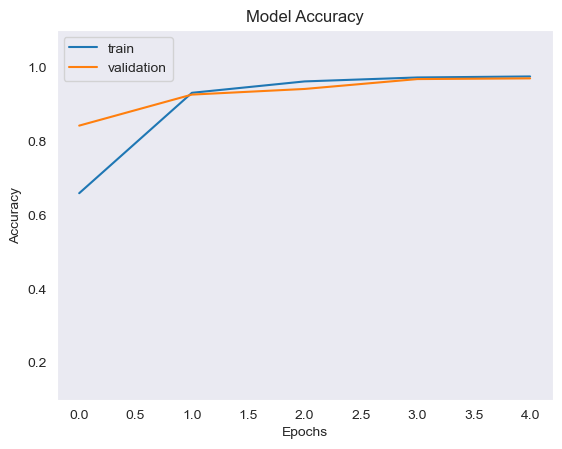

In [29]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1, ymax = 1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

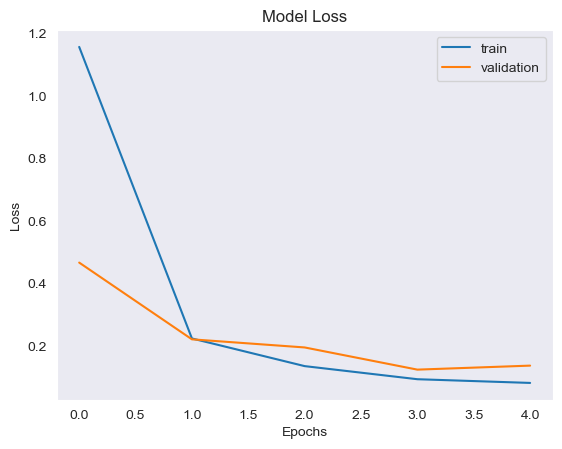

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show

# Model Evaluation

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(512, 512))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Preprocess the images from the validation generator
preprocessed_images = []

for image_path in test_generator.filepaths:
    preprocessed_img = preprocess_image(image_path)
    preprocessed_images.append(preprocessed_img)

preprocessed_images = np.vstack(preprocessed_images)

# Generate predictions
Y_pred = model.predict(preprocessed_images)

# Assuming your model outputs probabilities, get predicted labels
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

53/53 [==============================] - 143s 3s/step


In [7]:
class_labels = list(test_generator.class_indices.keys())
print(class_labels)

class_labels = ['Abhayagiriya', 'Adam_s Peak', 'Colombo Municipal Council', 'Colombo National Museum', 'Galle Light House', 'Ambuluwawa Tower', 'Lotus Tower', 'Maligawila Buddha Statue', 'Nine Arch Bridge', 'Polonnaruwa watadageya', 'Ranmasu Uyana', 'Ravana Falls', 'Red Mosque', 'Ruwanwelisaya', 'Sigiriya Rock', 'St.Clairs Water Fall', 'Temple of Tooth Relic', 'Thuparamaya Dagaba']

['Abhayagiriya', 'Adam_s Peak', 'Colombo Municipal Council', 'Colombo National Museum', 'Galle Light House', 'Gampola Kingdom_s Ambuluwawa Tower', 'Lotus Tower', 'Maligawila Buddha Statue', 'Nine Arch Bridge', 'Polonnaruwa watadageya', 'Ranmasu Uyana', 'Red Mosque', 'Ruwanwelisaya', 'Sigiriya Rock', 'Temple of Tooth Relic', 'Thuparamaya Dagaba']


In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=class_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[131   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0  59   1   0   0   1   0   0   0   0   0   0   1   0   2   0]
 [  0   0 136   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 132   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   1  97   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0  73   0   0   0   0   0   0   1   0   2   0]
 [  0   0   5   0   0   0  99   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  68   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  92   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 120   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2  58   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0 119   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  84   0   0   0]
 [  1   6   0   1   0   0   0   1   0   1   0   0   0 138   0   0]
 [  0   0   1   0   0   0   0   0   0   0   

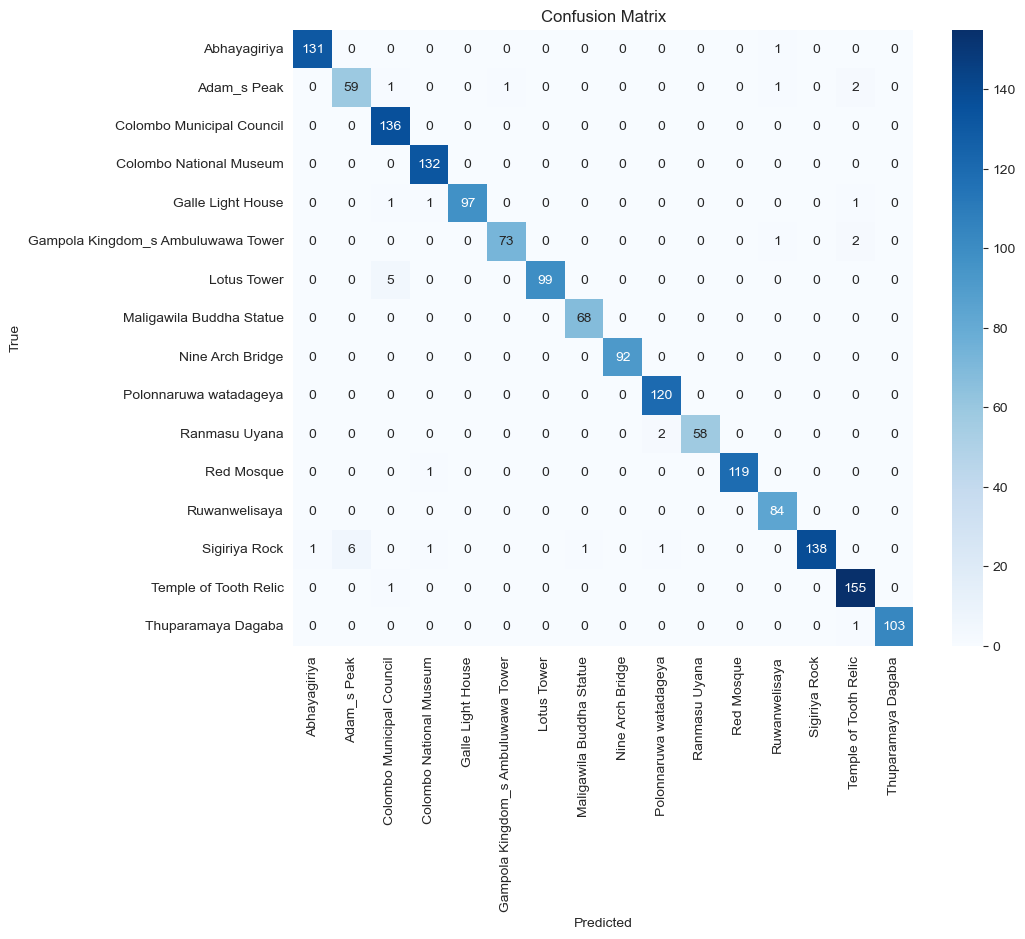

In [31]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [6]:
import numpy as np
from keras.models import load_model
# from keras.preprocessing import image
# from keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your trained CNN model
model = load_model('C:/Users/rmdmc/OneDrive/Desktop/Study Materials/2nd Year/DSGP/Model/Our Dataset/InceptionV3_final.keras') 

# Assuming you have test generator (test_generator)
# You've already defined it as shown in your code

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(512, 512))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Preprocess the images from the validation generator
preprocessed_images = []

for image_path in test_generator.filepaths:
    preprocessed_img = preprocess_image(image_path)
    preprocessed_images.append(preprocessed_img)

preprocessed_images = np.vstack(preprocessed_images)

# Make predictions on the validation set
y_pred = model.predict(preprocessed_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Extract true labels from validation generator
y_true_classes = test_generator.classes

# Compute accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Compute precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


53/53 [==============================] - 149s 3s/step
Accuracy: 98.11%
Precision: 0.98
Recall: 0.98
F1-score: 0.98
